<a href="https://colab.research.google.com/github/BrenoMilagres/DataScienceProjetos/blob/master/analiseExploratoriaFutebol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória base de dados do futebol europeu. 


Dados sobre jogos de futebol podem ser encontrados facilmente, mas eles geralmente estão espalhados por diferentes sites, desbalanceados e não trasmitem conhecimento. Uma completa coleta e processamento de dados foram executados para possibilitar a análise. 
> O dataset foi baixado do kaggle e apresenta: 


- +25.000 partidas
- +10.000 jogadores
- 11 países europeus com seu campeonato de liderança
- Temporadas de 2008 a 2016
- Atributos de jogadores e equipes *provenientes da série de videogames FIFA da EA Sports, incluindo as atualizações semanais*
- Equipe alinhada com formação de esquadrão (coordenadas X, Y)
- Eventos de jogo detalhados (tipos de gols, posse de bola, canto, cruzamento, faltas, cartões, etc ...) para +10.000 jogos  

A previsão de eventos esportivos, em especial o futebol, através da utilização de algoritmos
de machine learning é uma área de pesquisa que vem ganhando destaque, devido à
grande popularidade do esporte, o aumento da quantidade de dados disponíveis e a difusão das plataformas de apostas. 



In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
import itertools
from subprocess import check_output

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving database.sqlite to database.sqlite


# Conecção com Banco de dados 

Primeiro é necessário fazer a conexão com o banco de dados e criar os dataframes a partir de consultas SQL utilizando o pandas.
> A estrutura básica da consulta é muito simples: você define as features que deseja ver após o SELECT, * significa todas as colunas possíveis, a tabela é selecionada após o FROM.

In [ ]:
with sqlite3.connect("database.sqlite") as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)


# Análise exploratória dos  dados.

a partir das tabelas existentes no Banco de dados foram criados 8 dataframes.

In [ ]:
# Países 
countries.head(11)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [ ]:
#Ligas
leagues.head(11)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [ ]:
leagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [ ]:
# Partidas
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [ ]:
#Times 
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [ ]:
# Jogadores
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [ ]:
# Atributos dos Jogadores (Base de dados dos FIFA) 
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [ ]:
sequence.head(7)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [ ]:
sequence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [ ]:
# Atributos dos times 
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [ ]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

# Unindo Tabelas 
> Assim como no SQL, é possivel unir bases de dados de diferentes maneiras, o Pandas nos permite fazer esta tratativa no Python. Abaixo serão feitas uniões de tabelas afim de extrairmos informações interessantes a análise.

#### - Unindo Tabelas: Países e Ligas 

In [ ]:
#Merge country e leauge data
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})
countries_leagues.head()

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A


#### - Tratando a tabela de partidas e unindo com a tabela countrie_leagues

In [ ]:
#Selecionando colunas necessárias
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)
matches_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        25979 non-null  int64 
 1   league_id         25979 non-null  int64 
 2   season            25979 non-null  object
 3   stage             25979 non-null  int64 
 4   date              25979 non-null  object
 5   match_api_id      25979 non-null  int64 
 6   home_team_api_id  25979 non-null  int64 
 7   away_team_api_id  25979 non-null  int64 
 8   home_team_goal    25979 non-null  int64 
 9   away_team_goal    25979 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 2.0+ MB


In [ ]:
#merge leauge data with match data
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#checando valores null
data.isnull().sum()


country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [ ]:
#Valores unicos em data
data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

In [ ]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


# Plots com indicadores interessantes a análise.

#### - Número de partidas registradas por liga.

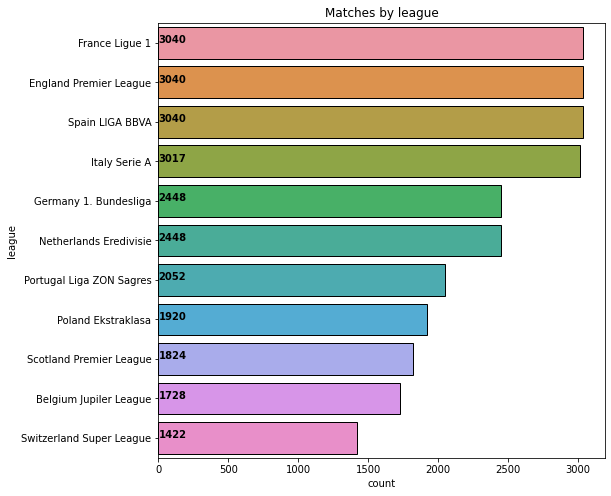

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

#### - Gols do time da casa e gols do time visitante divididos  por liga.

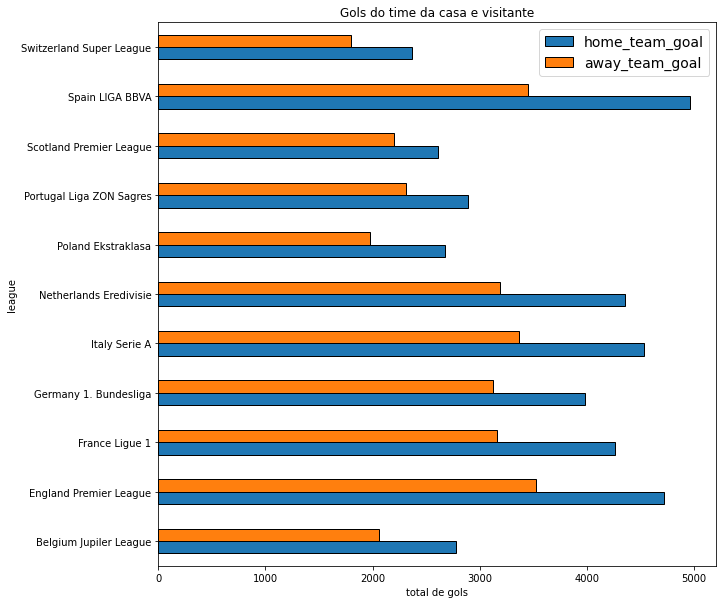

In [ ]:
data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"}).plot(kind="barh",
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )
plt.title("Gols do time da casa e visitante")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total de gols")
plt.show()

#### - Partidas jogadas em cada liga por temporada 

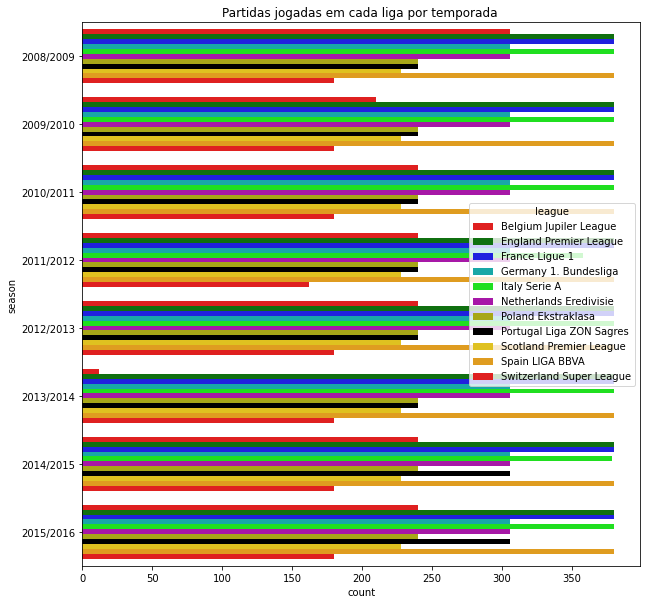

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y = data["season"],hue=data["league"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange"])
plt.title("Partidas jogadas em cada liga por temporada ")
plt.show()

# Unindo a tabela de times 
> Separando os dados em times da casa e visitantes.

In [ ]:
# times  mandantes 
data = data.merge(teams,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'home_team_lname',
       'home_team_sname'],
      dtype='object')

In [ ]:
# Times visitantes 
data = data.merge(teams,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

#### Verificando os 20 times que marcaram mais gols como mandantes e como visitantes. 

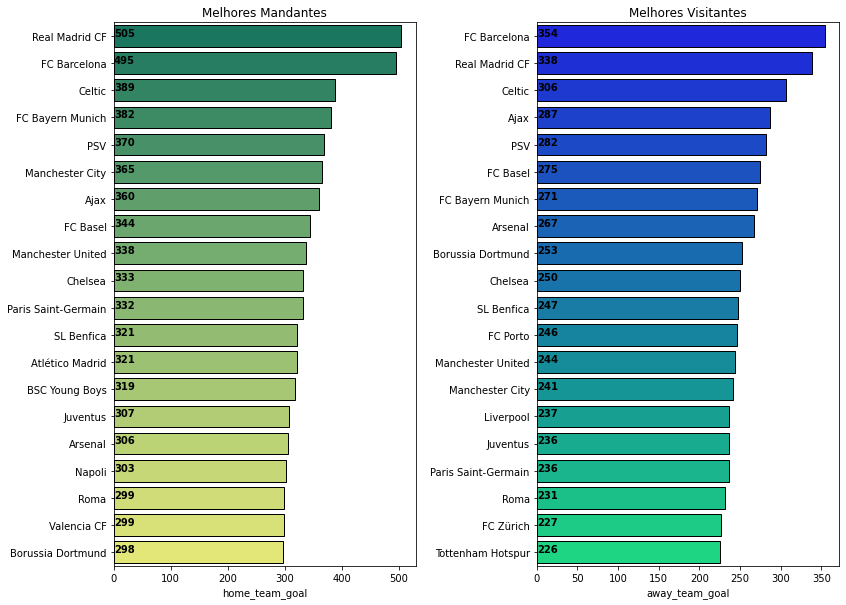

In [ ]:
h_t = data.groupby("home_team_lname")["home_team_goal"].sum().reset_index()
a_t = data.groupby("away_team_lname")["away_team_goal"].sum().reset_index()
h_t = h_t.sort_values(by="home_team_goal",ascending= False)
a_t = a_t.sort_values(by="away_team_goal",ascending= False)
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="home_team_lname",x="home_team_goal",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("Melhores Mandantes")
for i,j in enumerate(h_t["home_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="away_team_lname",x="away_team_goal",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("Melhores Visitantes")
for i,j in enumerate(a_t["away_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")

#### Verificando os 30 times com maior número de gols.
> Tratando gols fora e dentro para virarem uma única coluna.

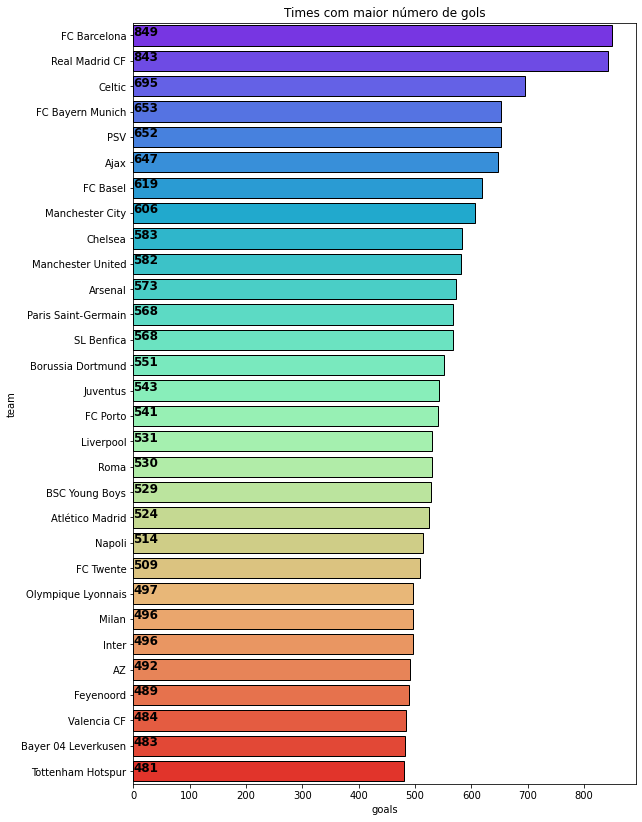

In [ ]:
x = h_t
x = x.rename(columns={'home_team_lname':"team", 'home_team_goal':"goals"})
y = a_t
y = y.rename(columns={'away_team_lname':"team", 'away_team_goal':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Times com maior número de gols")
plt.show()

#### - Número de partidas por time.

In [ ]:
x = data.groupby("home_team_lname")["match_api_id"].count().reset_index()
x = x.rename(columns={"home_team_lname":"team"})
y = data.groupby("away_team_lname")["match_api_id"].count().reset_index()
y = y.rename(columns={"away_team_lname":"team"})
xy = pd.concat([x,y],axis=0)
match_teams =  xy.groupby("team")["match_api_id"].sum().reset_index().sort_values(by="match_api_id",ascending =False)
match_teams = match_teams.rename(columns={"match_api_id":"matches_played"})
match_teams[:40]

,team,matches_played
51,Chelsea,304
22,Athletic Club de Bilbao,304
186,Paris Saint-Germain,304
256,Sunderland,304
180,Olympique de Marseille,304
179,Olympique Lyonnais,304
255,Stoke City,304
83,FC Lorient,304
273,Valencia CF,304
168,Málaga CF,304
